In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [32]:
df = pd.read_csv("FuelConsumptionCo2.csv")

In [33]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [34]:
a=0.01

In [35]:
x = df[['ENGINESIZE','CYLINDERS']].values
y = df[['CO2EMISSIONS']].values

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [37]:
X = []
for row in x_train:
    r = [1]
    for item in row:
        r.append(item)
    X.append(r)

In [38]:
X = np.asmatrix(X)

In [39]:
X.shape

(853, 3)

In [40]:
theta = np.zeros(((X[0].size), 1))

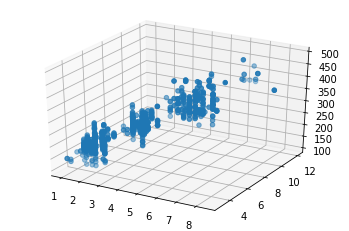

In [41]:
fig = plt.figure()
ax = plt.axes(projection = '3d')
zs = df['CO2EMISSIONS']
xs=df['ENGINESIZE']
ys=df['CYLINDERS']
ax.scatter3D(xs, ys, zs, 'red')

In [42]:
Y = y_train

In [43]:
X.shape

(853, 3)

In [44]:
Y.shape

(853, 1)

In [45]:
h = np.dot(X, theta)
h.shape

(853, 1)

In [46]:
# cost = np.dot((np.transpose(h-Y)), (h-Y))
cost = np.sum (np.dot(np.transpose(h-Y), (h-Y)))*(1/(2*X.shape[0]))

In [47]:
cost

35150.623094958966

In [48]:
h.shape

(853, 1)

In [49]:
temp = np.zeros(theta.shape)

In [50]:
temp.shape

(3, 1)

In [51]:
def gradientDescent(theta, X):
    h = np.dot(X, theta)
    cost = np.sum(np.dot(np.transpose(h-Y), (h-Y)))*(1/(2*X.shape[0]))
    print(cost)
    for i in range(0, theta.shape[0]):
        temp[i] = theta[i] - np.sum(np.dot((h-Y), X[i])) * (a/X.shape[0])
    for i in range(0, theta.shape[0]):
        theta[i] = temp[i]
    return(theta, X, cost)

In [52]:
oldCost = 0
for i in range(0, 3000):
    (theta, X, cost) = gradientDescent(theta, X)
    if((oldCost - cost) **2 < 0.0000000002):
        break
print(oldCost)
print(cost)
print(theta)

35150.623094958966
2208.3531958368008
765.7497938941891
810.210712739102
797.0748947730115
799.1284356962489
798.7777951571638
798.8367601773292
798.8268189841692
798.8284942937337
798.8282119467061
798.8282595312647
798.8282515117188
798.8282528632731
798.828252635492
798.8282526738806
798.8282526674111
798.8282526685015
798.8282526683175
798.8282526683489
798.8282526683431
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.828252

798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.828252

798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.828252

798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.828252

798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.8282526683442
798.828252

In [53]:
X_test = []
for row in x_test:
    r = [1]
    for item in row:
        r.append(item)
    X_test.append(r)

In [54]:
theta

array([[23.36617446],
       [29.97924271],
       [23.14573886]])

In [55]:
theta.shape

(3, 1)

In [56]:
np.dot(X_test, theta) - y_test

array([[  17.41792021],
       [ -21.10068761],
       [ -42.10068761],
       [  31.18456292],
       [  22.89723666],
       [  48.44075323],
       [ -24.10068761],
       [  -5.83411865],
       [ -14.10068761],
       [  24.42829886],
       [ -42.83411865],
       [ -24.60906426],
       [  28.17833573],
       [  59.44075323],
       [ -19.07993032],
       [  68.44905615],
       [ -61.56754968],
       [ -59.08408178],
       [  16.16795708],
       [ 139.97804262],
       [ -21.08823323],
       [  78.16795708],
       [  23.16795708],
       [ -66.09238469],
       [  59.89723666],
       [ -30.82166427],
       [   2.1617299 ],
       [  73.42207167],
       [ 127.41792021],
       [  65.90761531],
       [  17.41584448],
       [ -48.10276334],
       [  38.16795708],
       [  15.17833573],
       [ -21.08823323],
       [ -32.08408178],
       [  85.41376876],
       [ -33.10068761],
       [ -40.1069148 ],
       [  33.16588135],
       [ -14.08823323],
       [ -14.088